(3,)
[-4.22587872e-13  3.33812914e+02  6.67887871e+02]


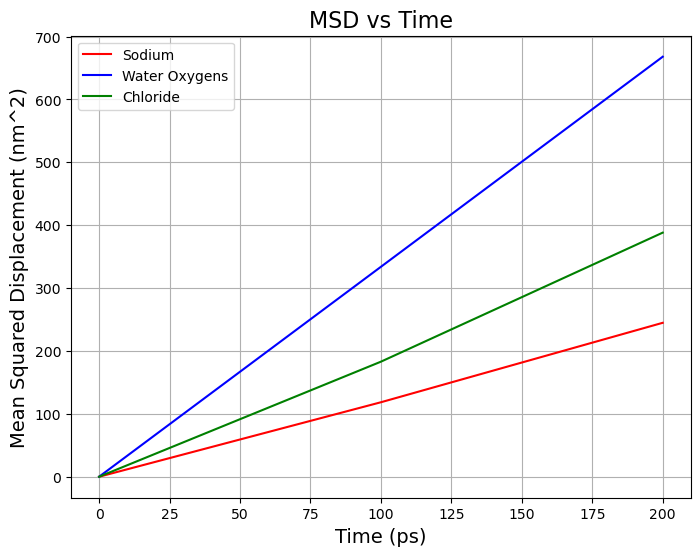

In [4]:
# MSD
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import matplotlib.pyplot as plt
import os

# Load the trajectory and topology
u = mda.Universe("step5_2.gro", "unwrapped.xtc")

# Select atom groups for Water Oxygens, Sodium, and Oxygen, which is the same 
water_oxygens = u.select_atoms("name OH2")
sodium = u.select_atoms("name SOD")
chloride = u.select_atoms("name CLA")
# Calculate MSD for each atom group
msd_water_oxygen = EinsteinMSD(water_oxygens, select='all', msd_type='xyz').run()
msd_sodium = EinsteinMSD(sodium, select='all', msd_type='xyz').run()
msd_chloride = EinsteinMSD(chloride, select='all', msd_type='xyz').run()

# Create the Figures directory if it doesn't exist
if not os.path.exists("../Figures"):
    os.makedirs("../Figures")
    
msd_sodium.results.msds_by_particle

print(msd_water_oxygen.times.shape)
print(msd_water_oxygen.results.timeseries)

# Plot MSD vs Time for all two groups water oxygen is the same as oxygen for whole system
plt.figure(figsize=(8, 6))

# Plot the MSD for Sodium, Water Oxygens, and Chloride
plt.plot(msd_sodium.times, msd_sodium.results.timeseries, label='Sodium', color='r')
plt.plot(msd_water_oxygen.times, msd_water_oxygen.results.timeseries, label='Water Oxygens', color='b')
plt.plot(msd_chloride.times, msd_chloride.results.timeseries, label='Chloride', color='g')

# Add labels, title, grid, and legend
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Mean Squared Displacement (nm^2)', fontsize=14)
plt.title('MSD vs Time', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot (after all the above commands)
plt.show()